In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Sales Dataset.xlsx")
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              78025 non-null

In [4]:
df.shape


(78025, 13)

In [5]:
df.describe()


,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,78025.000000,78025.000000,78025.000000
mean,43.595348,2.955732,30085.664992
std,26.585600,1.497242,21169.932617
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13816.000000
50%,43.000000,3.000000,29845.000000
75%,65.000000,3.000000,43185.000000
max,210.000000,23.000000,149981.000000


In [6]:
df_dub = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)
df_dub.shape

(78025, 13)

In [7]:
df.shape


(78025, 13)

### Mapping

In [8]:
# List of variables to map

varlist =  ['Opportunity Status']

# Defining the map function
def binary_map(x):
    return x.map({'Won': 1, "Loss": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,1,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


### Dproping 'Opportunity ID' field as it will not help to take decision

In [9]:
df= df.drop(['Opportunity ID'],axis=1)
df.head()

,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,ERP Implementation,Bengaluru,Marketing,76,1,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [10]:
df['Technology\nPrimary'].describe()


count                  78025
unique                     4
top       ERP Implementation
freq                   49810
Name: Technology\nPrimary, dtype: object

In [11]:
df['Technology\nPrimary'].value_counts()


Technology\nPrimary
ERP Implementation              49810
Technical Business Solutions    27325
Legacy Modernization              609
Analytics                         281
Name: count, dtype: int64

#### EDA

In [12]:
df['City'].describe()

count      78025
unique         7
top       Mumbai
freq       21020
Name: City, dtype: object

In [13]:
df['City'].value_counts()

City
Mumbai       21020
Delhi        15142
Bengaluru     9552
Hyderabad     9232
Pune          8153
Chennai       7568
Kolkata       7358
Name: count, dtype: int64

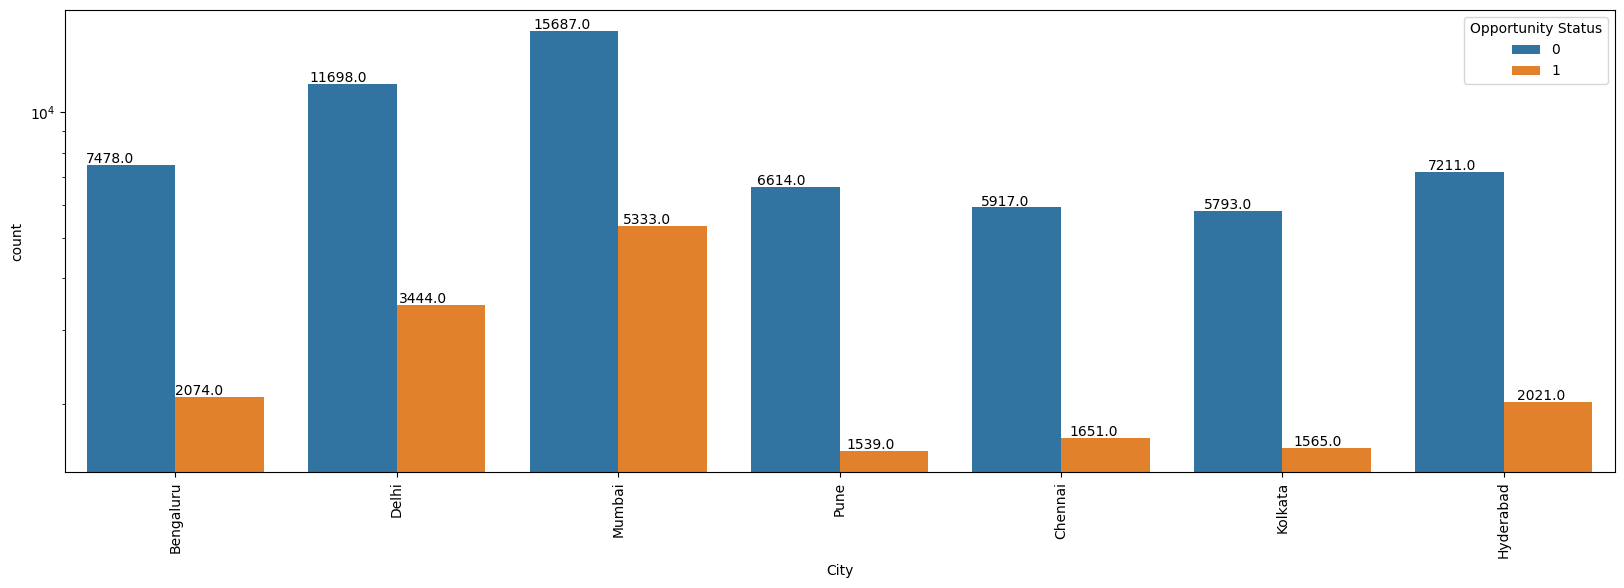

In [14]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "City", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### B2B Sales Medium

In [15]:
df['B2B Sales Medium'].describe()

count         78025
unique            5
top       Marketing
freq          37262
Name: B2B Sales Medium, dtype: object

In [16]:
df['B2B Sales Medium'].value_counts()

B2B Sales Medium
Marketing             37262
Enterprise Sellers    34758
Partners               2856
Tele Sales             2530
Online Leads            619
Name: count, dtype: int64

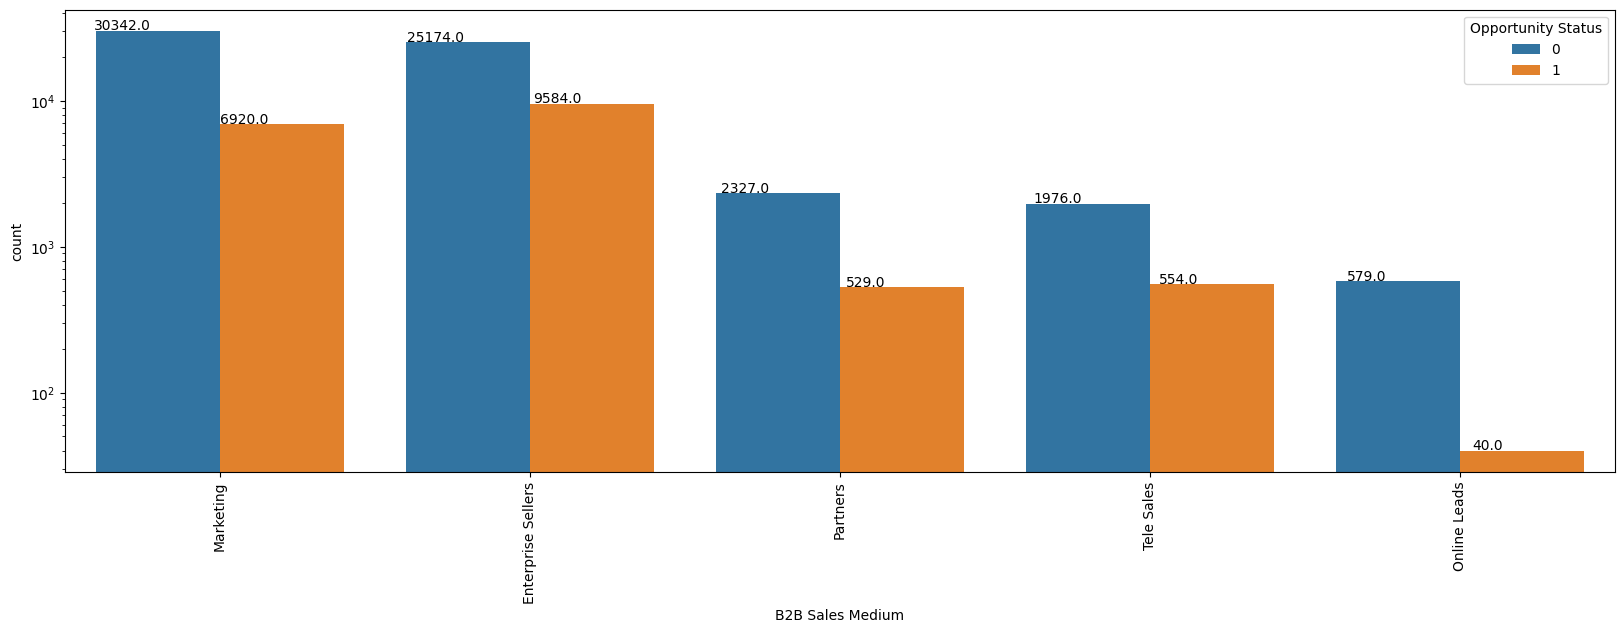

In [17]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "B2B Sales Medium", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Sales Velocity

In [18]:
df['Sales Velocity'].describe()

count    78025.000000
mean        43.595348
std         26.585600
min          0.000000
25%         19.000000
50%         43.000000
75%         65.000000
max        210.000000
Name: Sales Velocity, dtype: float64

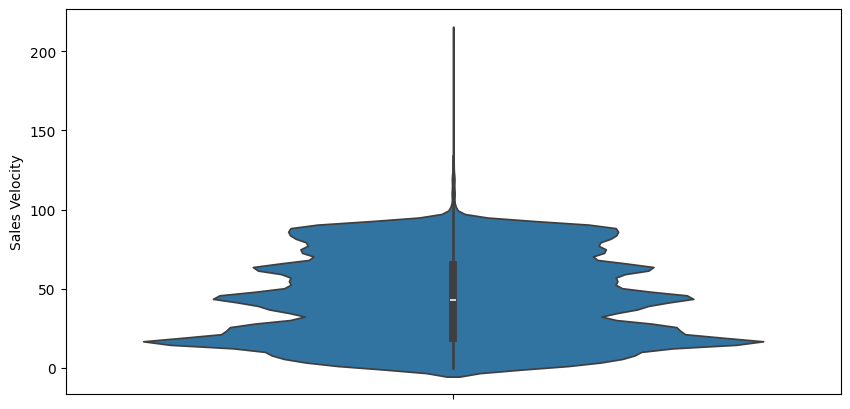

In [19]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Velocity'])
plt.show()

In [20]:
percentiles = df['Sales Velocity'].quantile([0.05,0.95]).values
df['Sales Velocity'][df['Sales Velocity'] <= percentiles[0]] = percentiles[0]
df['Sales Velocity'][df['Sales Velocity'] >= percentiles[1]] = percentiles[1]

C:\Users\Willi\AppData\Local\Temp\ipykernel_14040\3175349709.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sales Velocity'][df['Sales Velocity'] <= percentiles[0]] = percentiles[0]
C:\Users\Willi\AppData\Local\Temp\ipykernel_14040\

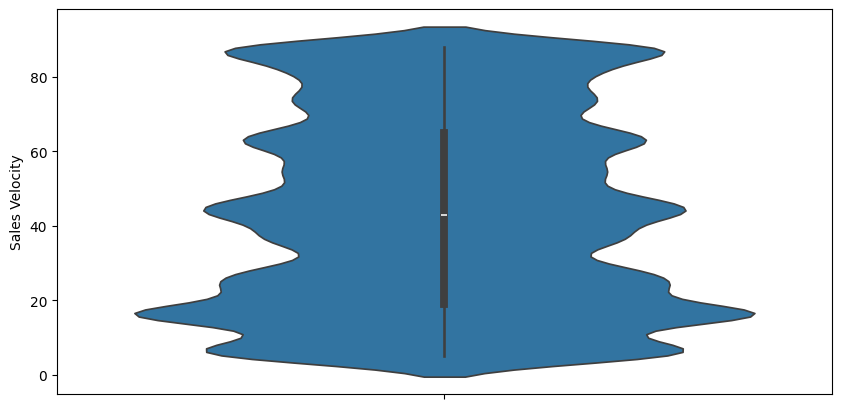

In [21]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Velocity'])
plt.show()

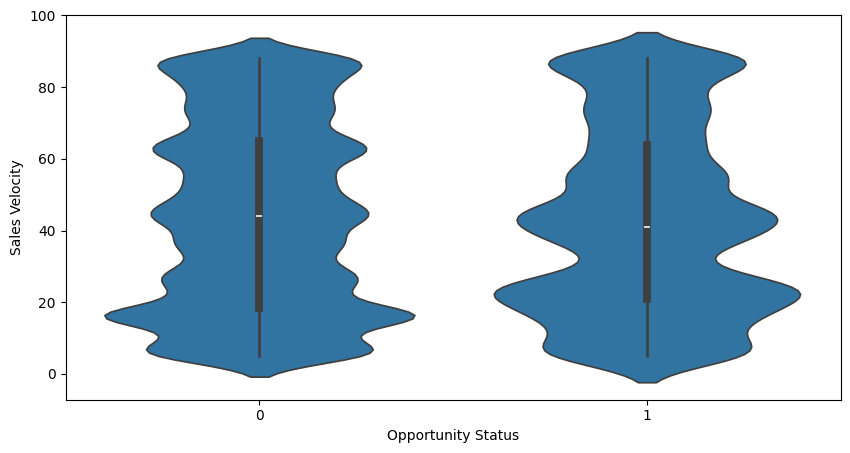

In [22]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Sales Velocity', x = 'Opportunity Status', data = df)
plt.show()

### Opportunity Status

In [23]:
df['Opportunity Status'].describe()

count    78025.000000
mean         0.225915
std          0.418186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Opportunity Status, dtype: float64

In [24]:
df['Opportunity Status'].value_counts()

Opportunity Status
0    60398
1    17627
Name: count, dtype: int64

### Sales Stage Iterations

In [25]:
df['Sales Stage Iterations'].describe()

count    78025.000000
mean         2.955732
std          1.497242
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         23.000000
Name: Sales Stage Iterations, dtype: float64

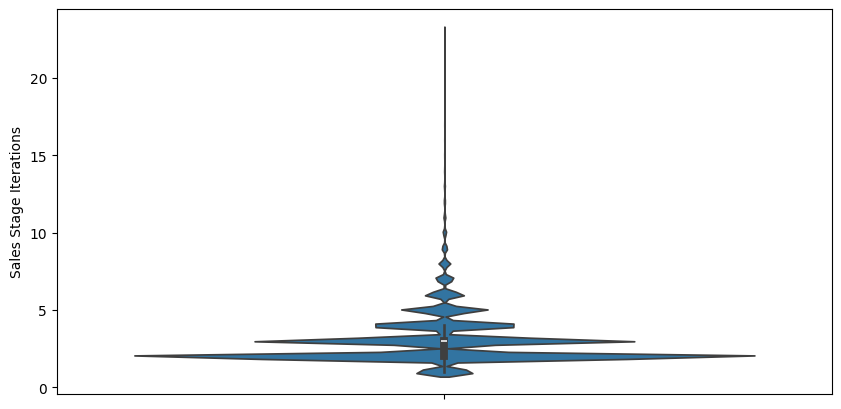

In [26]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Stage Iterations'])
plt.show()

In [27]:
percentiles = df['Sales Stage Iterations'].quantile([0.05,0.95]).values
df['Sales Stage Iterations'][df['Sales Stage Iterations'] <= percentiles[0]] = percentiles[0]
df['Sales Stage Iterations'][df['Sales Stage Iterations'] >= percentiles[1]] = percentiles[1]

C:\Users\Willi\AppData\Local\Temp\ipykernel_14040\3654716344.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sales Stage Iterations'][df['Sales Stage Iterations'] <= percentiles[0]] = percentiles[0]
C:\Users\Willi\AppData\Local\Temp\

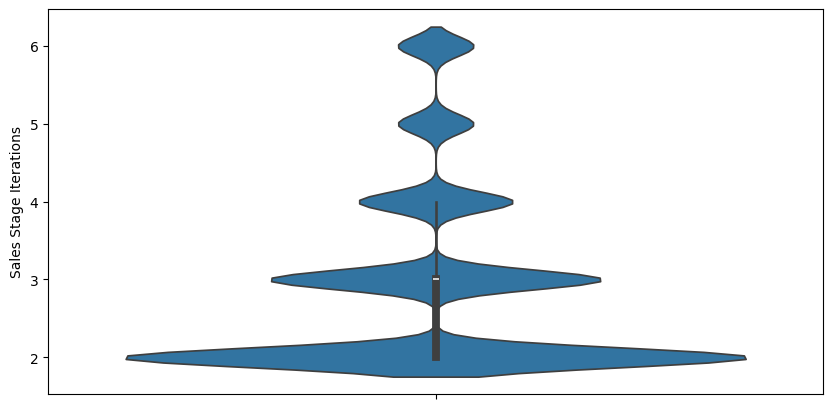

In [28]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales Stage Iterations'])
plt.show()

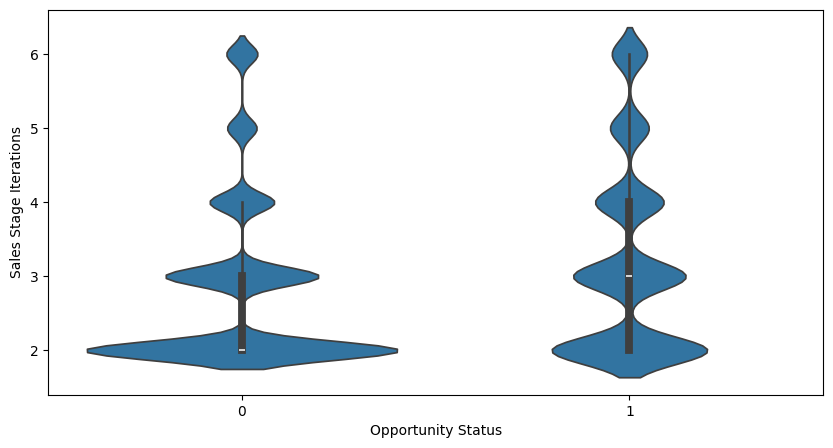

In [29]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Sales Stage Iterations', x = 'Opportunity Status', data = df)
plt.show()

### Opportunity Size (USD)

In [30]:
df['Opportunity Size (USD)'].describe()

count     78025.000000
mean      30085.664992
std       21169.932617
min           0.000000
25%       13816.000000
50%       29845.000000
75%       43185.000000
max      149981.000000
Name: Opportunity Size (USD), dtype: float64

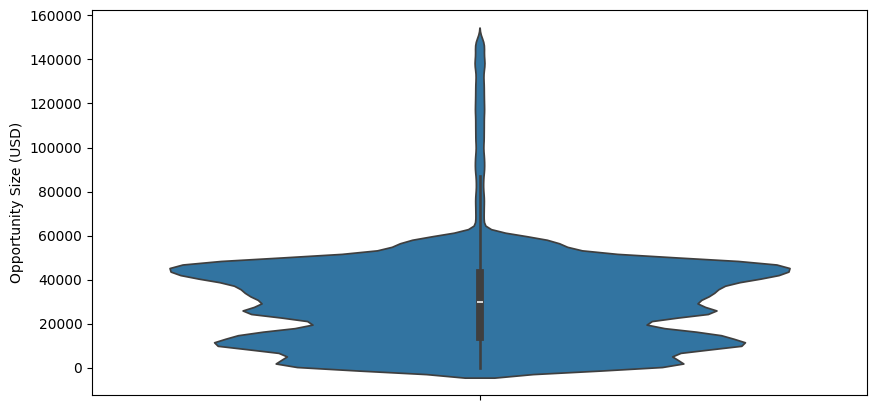

In [31]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Opportunity Size (USD)'])
plt.show()

In [32]:
percentiles = df['Opportunity Size (USD)'].quantile([0.05,0.95]).values
df['Opportunity Size (USD)'][df['Opportunity Size (USD)'] <= percentiles[0]] = percentiles[0]
df['Opportunity Size (USD)'][df['Opportunity Size (USD)'] >= percentiles[1]] = percentiles[1]

C:\Users\Willi\AppData\Local\Temp\ipykernel_14040\3838586068.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Opportunity Size (USD)'][df['Opportunity Size (USD)'] <= percentiles[0]] = percentiles[0]
C:\Users\Willi\AppData\Local\Temp\

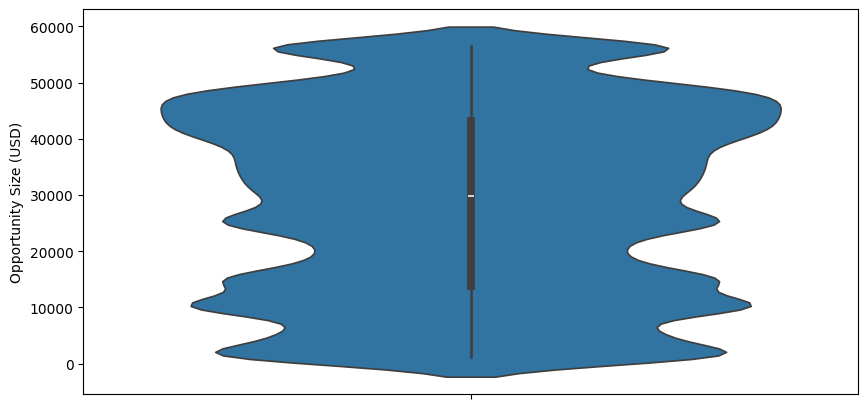

In [33]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Opportunity Size (USD)'])
plt.show()

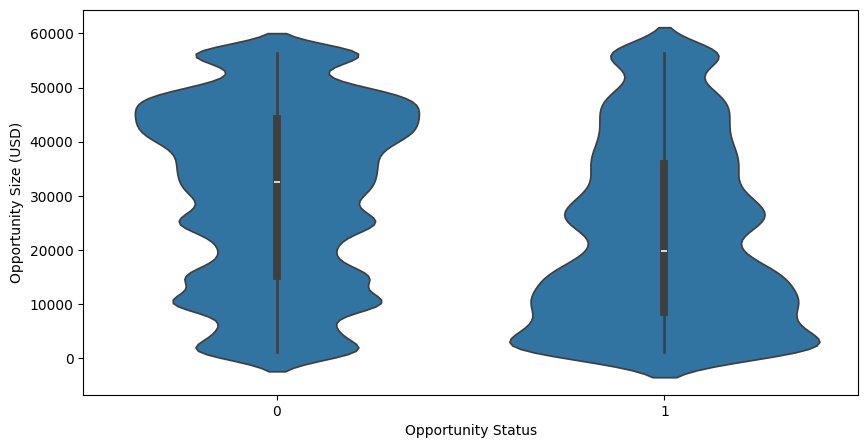

In [34]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Opportunity Size (USD)', x = 'Opportunity Status', data = df)
plt.show()

### Client Revenue Sizing

In [35]:
df['Client Revenue Sizing'].describe()

count            78025
unique               5
top       100K or less
freq             59504
Name: Client Revenue Sizing, dtype: object

In [36]:
df['Client Revenue Sizing'].value_counts()

Client Revenue Sizing
100K or less    59504
More than 1M     5288
250K to 500K     4756
500K to 1M       4636
100K to 250K     3841
Name: count, dtype: int64

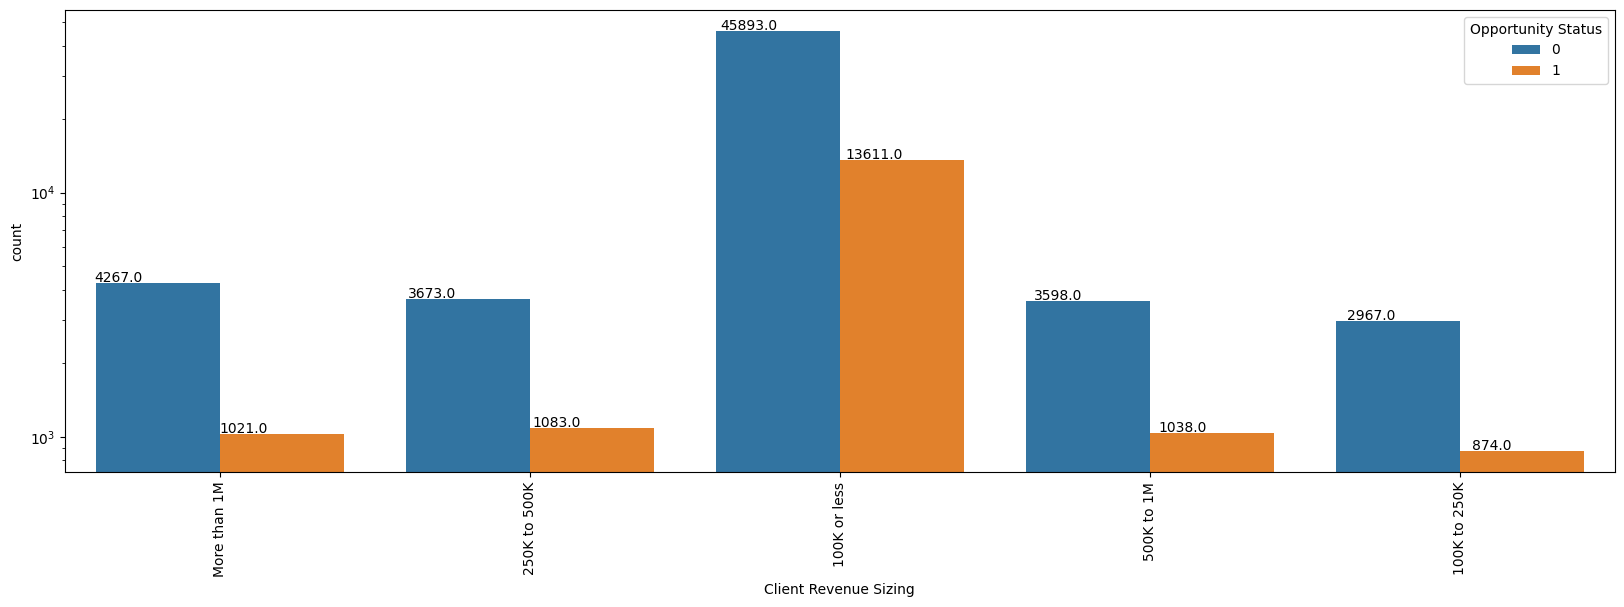

In [37]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Client Revenue Sizing", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Client Employee Sizing

In [38]:
df['Client Employee Sizing'].describe()

count          78025
unique             5
top       1K or less
freq           59348
Name: Client Employee Sizing, dtype: object

In [39]:
df['Client Employee Sizing'].value_counts()

Client Employee Sizing
1K or less       59348
More than 25K     5098
5K to 15K         4942
1K to 5K          4528
15K to 25K        4109
Name: count, dtype: int64

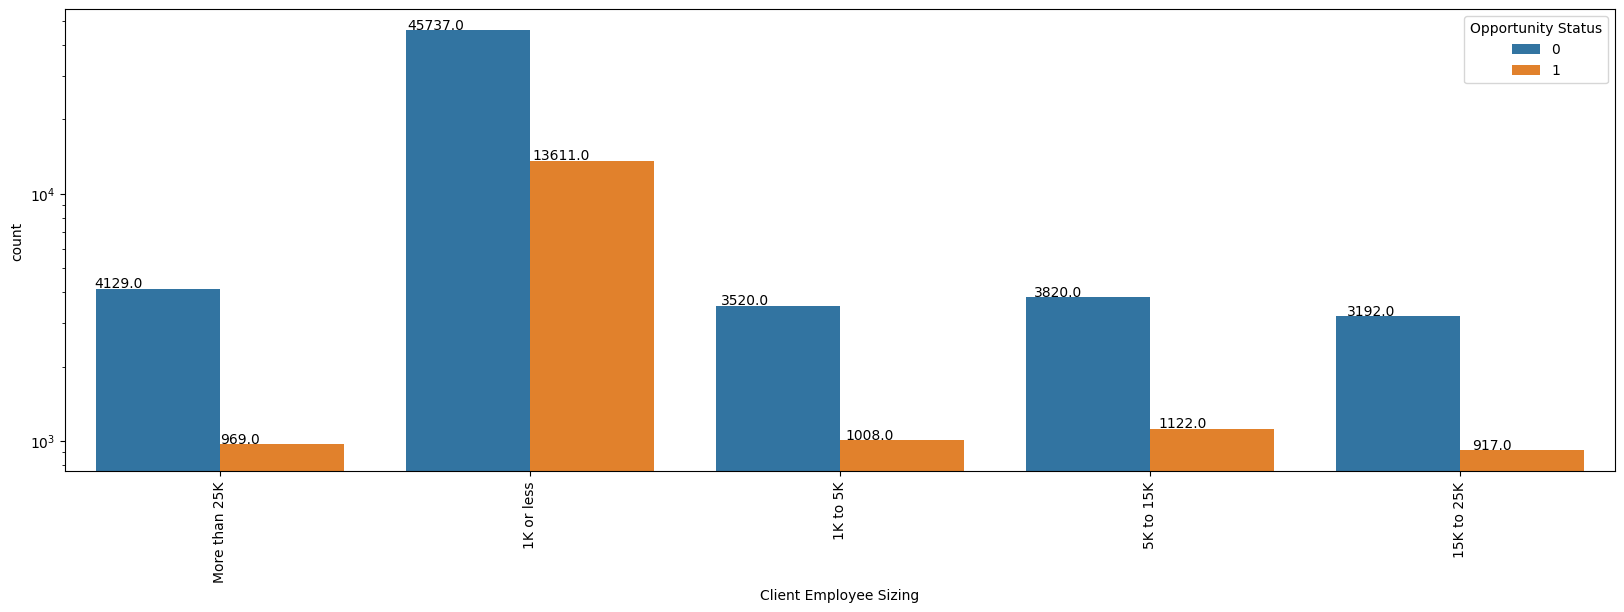

In [40]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Client Employee Sizing", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Business from Client Last Year

In [41]:
df['Business from Client Last Year'].describe()

count               78025
unique                  5
top       0 (No business)
freq                69208
Name: Business from Client Last Year, dtype: object

In [42]:
df['Business from Client Last Year'].value_counts()

Business from Client Last Year
0 (No business)      69208
More than 100,000     2860
50,000 - 100,000      2092
25,000 - 50,000       2083
0 - 25,000            1782
Name: count, dtype: int64

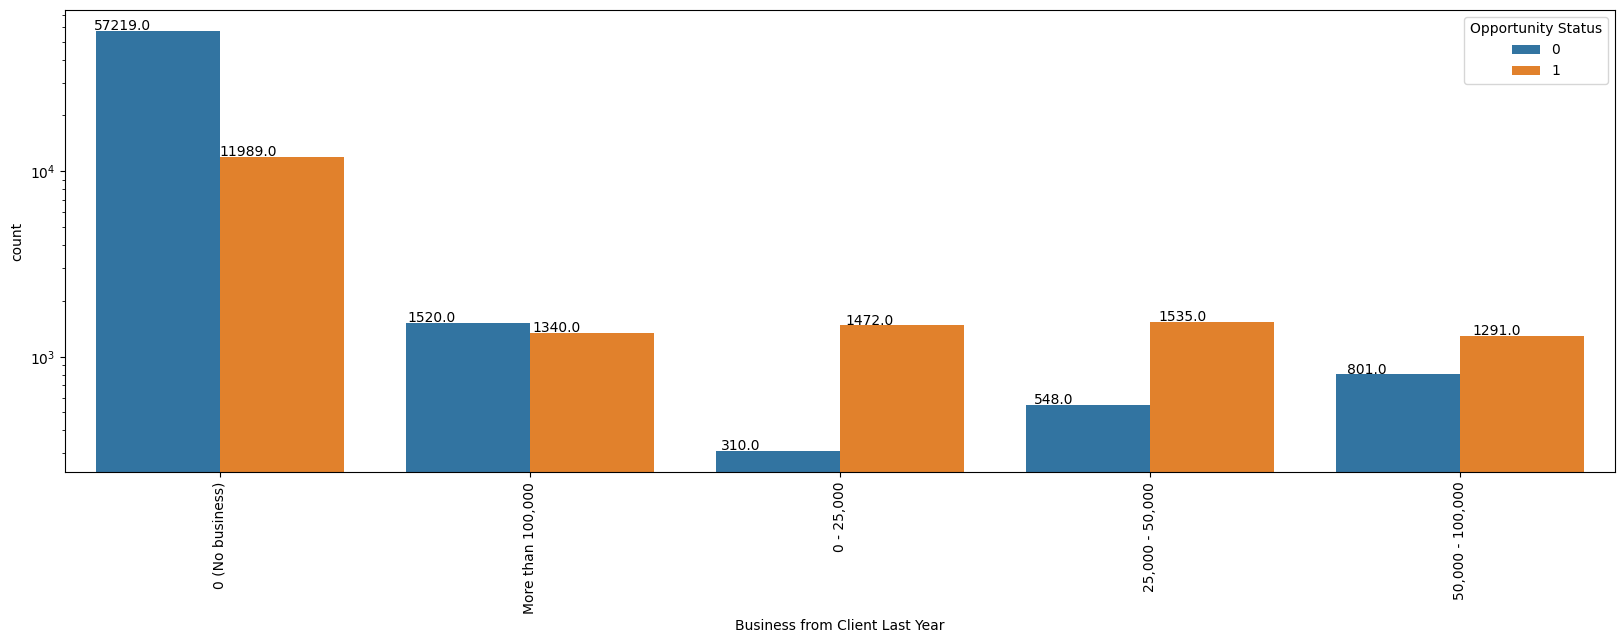

In [43]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Business from Client Last Year", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Compete Intel

In [44]:
df['Compete Intel'].describe()

count       68768
unique          2
top       Unknown
freq        56724
Name: Compete Intel, dtype: object

In [45]:
df['Compete Intel'].value_counts()

Compete Intel
Unknown    56724
Known      12044
Name: count, dtype: int64

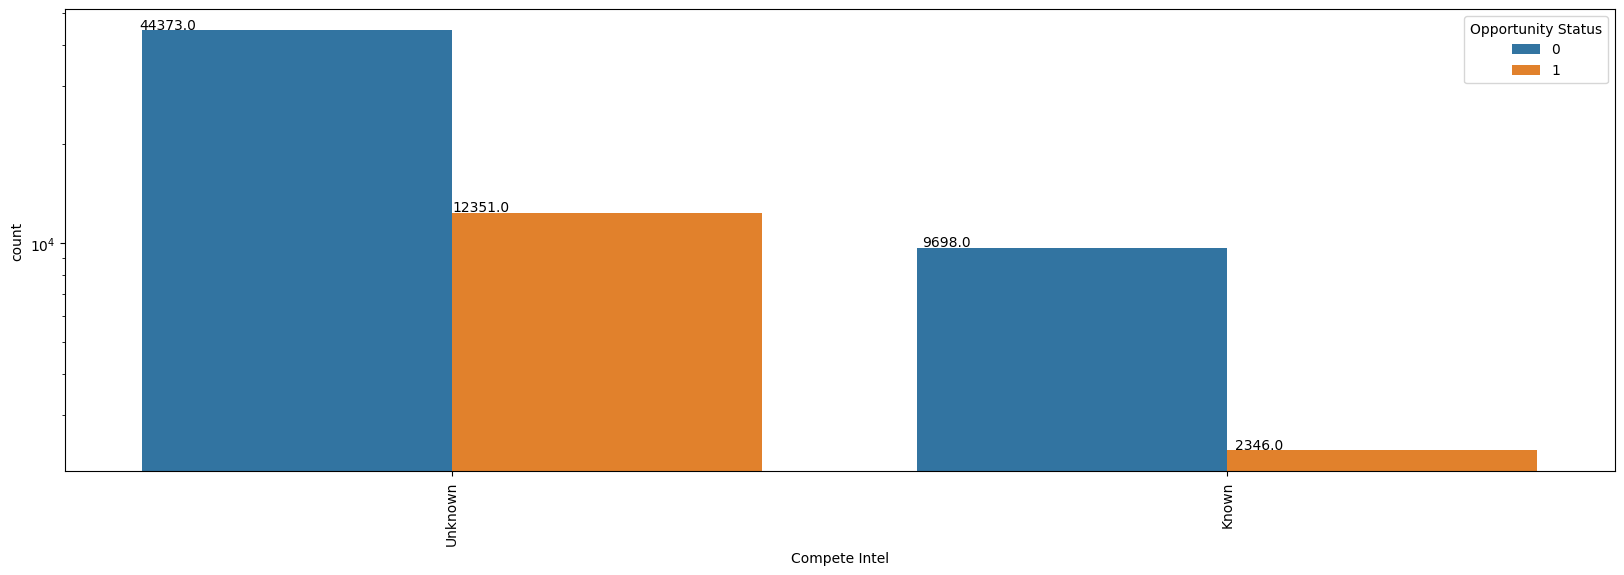

In [46]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Compete Intel", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Opportunity Sizing

In [47]:
df['Opportunity Sizing'].describe()

count          78025
unique             7
top       40K to 50K
freq           18074
Name: Opportunity Sizing, dtype: object

In [48]:
df['Opportunity Sizing'].value_counts()

Opportunity Sizing
40K to 50K       18074
10K to 20K       15123
30K to 40K       13628
10K or less      12095
20K to 30K       11968
50K to 60K        4934
More than 60K     2203
Name: count, dtype: int64

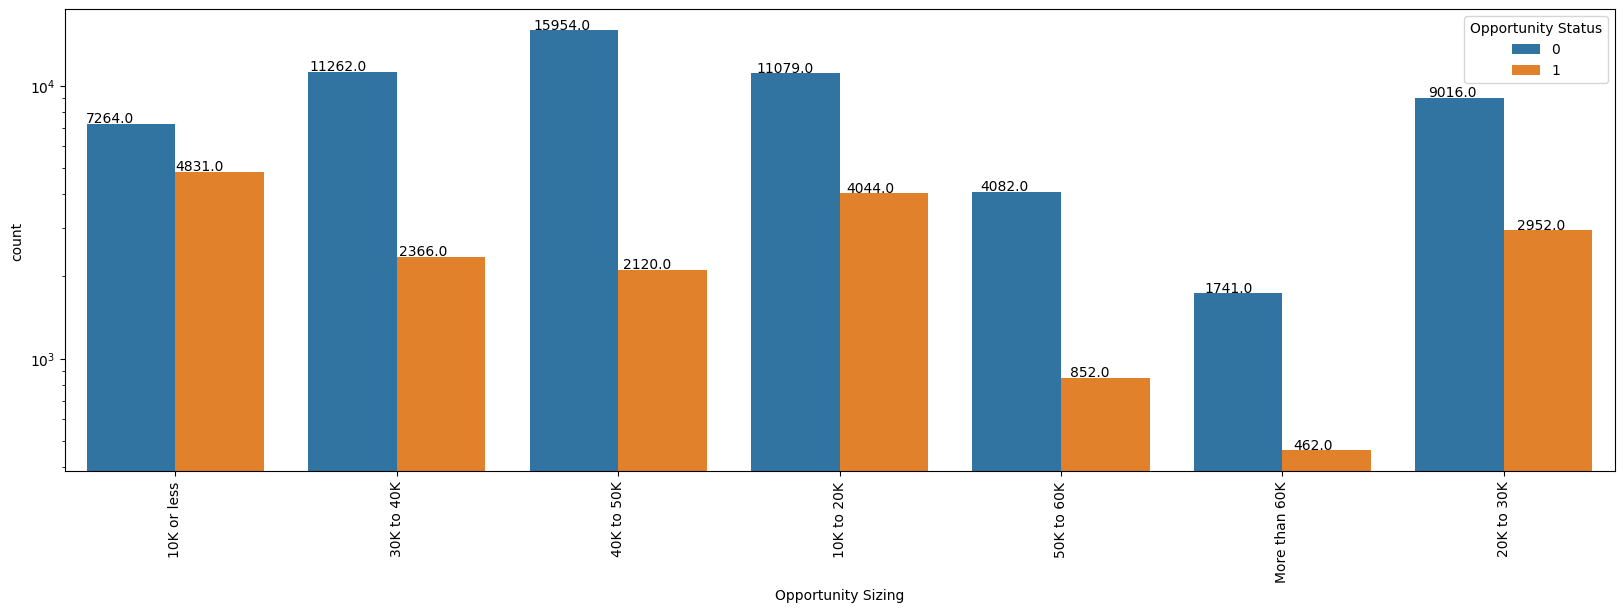

In [49]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Opportunity Sizing", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [50]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Client Revenue Sizing',
                            'Client Employee Sizing', 'Business from Client Last Year',
                            'Compete Intel', 'Opportunity Sizing']], drop_first=True)
dummy1.head()

,Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Marketing,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [51]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,ERP Implementation,Bengaluru,Marketing,76,1,6,1192.8,More than 1M,More than 25K,0 (No business),...,False,False,False,True,False,False,False,False,False,False
1,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,1192.8,250K to 500K,More than 25K,0 (No business),...,False,False,False,True,False,False,False,False,False,False
2,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,6,7750.0,100K or less,1K or less,0 (No business),...,False,False,False,True,False,False,False,False,False,False
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,1192.8,100K or less,1K or less,0 (No business),...,False,False,False,False,False,False,False,False,False,False
4,ERP Implementation,Delhi,Enterprise Sellers,69,0,6,32886.0,100K or less,1K or less,0 (No business),...,False,False,False,True,False,False,True,False,False,False


In [52]:
df = df.drop(['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Client Revenue Sizing',
              'Client Employee Sizing', 'Business from Client Last Year',
              'Compete Intel', 'Opportunity Sizing'], axis = 1)
df.head()

,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,76,1,6,1192.8,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,63,0,2,1192.8,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,24,1,6,7750.0,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,16,0,5,1192.8,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,69,0,6,32886.0,True,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False


In [53]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Opportunity Status'], axis=1)

In [54]:
X.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,76,6,1192.8,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,63,2,1192.8,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,24,6,7750.0,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,16,5,1192.8,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,69,6,32886.0,True,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False


In [55]:
X.shape

(78025, 35)

In [56]:
# Putting response variable to y
y = df['Opportunity Status']

In [57]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Opportunity Status, dtype: int64

In [58]:
y.shape

(78025,)

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=125)

In [60]:
X_train.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
20920,67,2,45671.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
25394,45,2,56309.0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
12555,46,3,31031.0,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
40022,7,4,31481.0,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
40488,12,2,38951.0,False,False,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False


In [61]:
X_train.shape

(54617, 35)

In [62]:
X_test.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
64168,46,3,7917.0,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
60072,65,2,10000.0,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
7959,88,2,37026.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
33330,28,5,56424.8,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
44742,9,2,25046.0,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [63]:
X_test.shape

(23408, 35)

In [64]:
y_train.head()

20920    0
25394    0
12555    0
40022    0
40488    0
Name: Opportunity Status, dtype: int64

In [65]:
y_train.shape

(54617,)

In [66]:
y_test.head()

64168    1
60072    1
7959     0
33330    0
44742    0
Name: Opportunity Status, dtype: int64

In [67]:
y_test.shape

(23408,)

### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Sales Velocity','Sales Stage Iterations',
         'Opportunity Size (USD)']] = scaler.fit_transform(X_train[['Sales Velocity','Sales Stage Iterations',
                                                                    'Opportunity Size (USD)']])

X_train.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
20920,0.899865,-0.786970,1.010905,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
25394,0.054926,-0.786970,1.645820,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
12555,0.093333,0.060733,0.137137,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
40022,-1.404513,0.908436,0.163994,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
40488,-1.212481,-0.786970,0.609831,False,False,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False


In [69]:
X_test[['Sales Velocity','Sales Stage Iterations',
         'Opportunity Size (USD)']] = scaler.transform(X_test[['Sales Velocity','Sales Stage Iterations',
                                                               'Opportunity Size (USD)']])

X_test.head()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD),Technology\nPrimary_ERP Implementation,Technology\nPrimary_Legacy Modernization,Technology\nPrimary_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,"Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
64168,0.093333,0.060733,-1.242391,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
60072,0.823052,-0.786970,-1.118070,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
7959,1.706397,-0.786970,0.494940,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
33330,-0.597981,1.756140,1.652731,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
44742,-1.327700,-0.786970,-0.220070,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [70]:
# Checking the Opportunity Status Rate
Opportunity = round((sum(df['Opportunity Status'])/len(df['Opportunity Status'].index))*100,2)
print("We have almost {} %  Opportunity rate after successful data manipulation".format(Opportunity))

We have almost 22.59 %  Opportunity rate after successful data manipulation


### Model Building

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

In [72]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [74]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9967409414651116


### VIF

In [75]:
print(X_train.dtypes)


Sales Velocity                                      float64
Sales Stage Iterations                              float64
Opportunity Size (USD)                              float64
Technology\nPrimary_ERP Implementation                 bool
Technology\nPrimary_Legacy Modernization               bool
Technology\nPrimary_Technical Business Solutions       bool
City_Chennai                                           bool
City_Delhi                                             bool
City_Hyderabad                                         bool
City_Kolkata                                           bool
City_Mumbai                                            bool
City_Pune                                              bool
B2B Sales Medium_Marketing                             bool
B2B Sales Medium_Online Leads                          bool
B2B Sales Medium_Partners                              bool
B2B Sales Medium_Tele Sales                            bool
Client Revenue Sizing_100K to 250K      

In [76]:
for col in X_train.columns:
    if X_train[col].dtype == bool:
        X_train[col] = X_train[col].astype(int)


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)


                                            Features    VIF
3             Technology\nPrimary_ERP Implementation  53.69
32                     Opportunity Sizing_40K to 50K  42.72
5   Technology\nPrimary_Technical Business Solutions  30.17
2                             Opportunity Size (USD)  29.09
31                     Opportunity Sizing_30K to 40K  19.08
33                     Opportunity Sizing_50K to 60K  18.08
20                 Client Employee Sizing_1K or less  17.34
34                  Opportunity Sizing_More than 60K   9.32
30                     Opportunity Sizing_20K to 30K   8.85
29                     Opportunity Sizing_10K to 20K   4.03
28                             Compete Intel_Unknown   4.02
10                                       City_Mumbai   3.20
7                                         City_Delhi   2.68
12                        B2B Sales Medium_Marketing   2.61
23              Client Employee Sizing_More than 25K   2.20
22                  Client Employee Sizi

In [78]:
features_to_remove = vif.loc[vif['VIF'] >= 5,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['Technology\nPrimary_ERP Implementation', 'Opportunity Sizing_40K to 50K', 'Technology\nPrimary_Technical Business Solutions', 'Opportunity Size (USD)', 'Opportunity Sizing_30K to 40K', 'Opportunity Sizing_50K to 60K', 'Client Employee Sizing_1K or less', 'Opportunity Sizing_More than 60K', 'Opportunity Sizing_20K to 30K']


In [79]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,Sales Velocity,Sales Stage Iterations,Technology\nPrimary_Legacy Modernization,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Marketing,...,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K
20920,0.899865,-0.786970,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25394,0.054926,-0.786970,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12555,0.093333,0.060733,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
40022,-1.404513,0.908436,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40488,-1.212481,-0.786970,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,Sales Velocity,Sales Stage Iterations,Technology\nPrimary_Legacy Modernization,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,B2B Sales Medium_Marketing,...,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_Unknown,Opportunity Sizing_10K to 20K
64168,0.093333,0.060733,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
60072,0.823052,-0.786970,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7959,1.706397,-0.786970,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
33330,-0.597981,1.756140,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
44742,-1.327700,-0.786970,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [81]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [83]:
accuracytrain = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracytrain)

accuracy_score on train dataset :  0.9256641704963656


### VIF

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Compete Intel_Unknown,2.96
7,City_Mumbai,2.02
9,B2B Sales Medium_Marketing,1.99
4,City_Delhi,1.78
5,City_Hyderabad,1.44
8,City_Pune,1.41
3,City_Chennai,1.36
6,City_Kolkata,1.35
14,Client Revenue Sizing_250K to 500K,1.32
19,Client Employee Sizing_More than 25K,1.30


In [85]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[41677   585]
 [ 3475  8880]]


In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# See the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.7187373532982598

In [88]:
# Calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9861577776726137

In [89]:
# Calculate false postive rate - predicting Opportunity when company does not have Opportunity
print(FP/ float(TN+FP))

0.013842222327386305


In [90]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9381933438985737


In [91]:
# Negative predictive value
print(TN / float(TN+ FN))

0.9230377391920623


### Plotting the ROC Curve

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

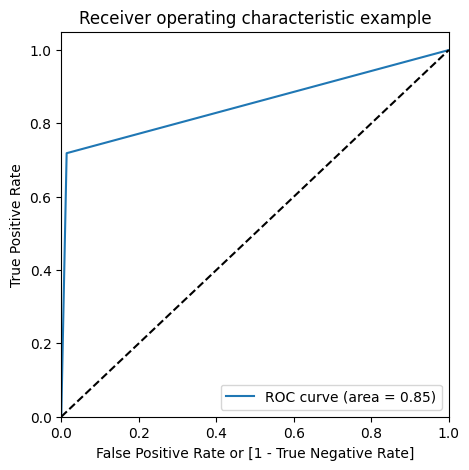

In [93]:
draw_roc(y_train,predict_train)


### Precision and Recall

In [94]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

0.9381933438985737

In [95]:
recall_score(y_train,predict_train)

0.7187373532982598

In [96]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [0 1 0 ... 1 0 0]


In [97]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[16268  1868]
 [ 2804  2468]]


In [98]:
# Check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.8004101161995899

In [99]:
# See the sensitivity of our model
testsensitivity=TP / float(TP+FN)
testsensitivity

0.7187373532982598

In [100]:
# Calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.9861577776726137

### Final Observation:

In [101]:
# Compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :99.67 %
Train Data Sensitivity :71.87 %
Train Data Specificity :98.62 %
Test Data Accuracy     :80.04 %
Test Data Sensitivity  :71.87 %
Test Data Specificity  :98.62 %
